код написан на python 3.6   
все ссылки кликабельны :)   
приятной проверки ^_^ 

In [45]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import rayleigh as ray, norm 

Плотность вероятности Рэлеевской случайной величины X имеет вид:

$f(x;\sigma )={\frac {x}{\sigma ^{2}}}e^{-x^{2}/(2\sigma ^{2})},\quad x\geq 0,\quad \sigma > 0,\quad$  где $\quad\sigma$  — параметр масштаба.  

Соответствующая функция распределения имеет вид  

$F(x;\sigma )=1-e^{-x^{2}/(2\sigma ^{2})}\quad$   для  $\quad x\in [0,\infty ).$

статья на русском [Распределение Рэлея](https://ru.wikipedia.org/wiki/Распределение_Рэлея)  
та же статья на [английском языке](https://en.wikipedia.org/wiki/Rayleigh_distribution), т.к. в русской есть неточности в формулах

###### Из Распределение Рэлея сгенерируем выборку объёма 1000:


In [46]:
x = 0
s = 1
rv = ray(loc=x, scale=s)
r = rv.rvs(size=1000)

###### случайная величина для построения теоретической плотности вероятности:

In [47]:
a = np.linspace(0, 4, 1000)
pdf = rv.pdf(a)

формула для расчета плотности вероятности   

${\displaystyle {\frac {x}{\sigma ^{2}}}e^{-x^{2}/\left(2\sigma ^{2}\right)}}$

###### построение гистограммы и теоретической плотности вероятности:

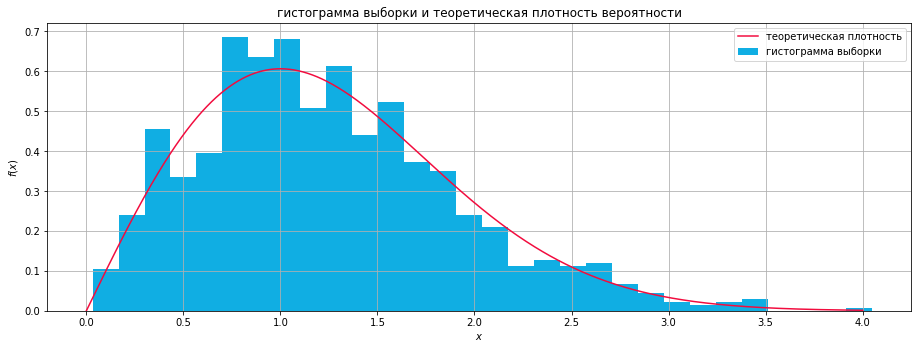

In [48]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 2, 1])
plt.hist(r, bins=30, color='#10AEE3', label = 'гистограмма выборки', density=True)
plt.plot(a, pdf, color='#F20C3E', label = 'теоретическая плотность')
plt.title('гистограмма выборки и теоретическая плотность вероятности')
plt.xlabel('$ x $')
plt.ylabel('$ f(x) $')
grid = plt.grid(True)  
plt.legend(loc = 1);


расчитаем математическое ожидание и дисперсию исходного распределения по следующим формулам:  
    
математическое ожидание:   $\sigma {\sqrt {\frac {\pi }{2}}}$

дисперсия: ${\frac {4-\pi }{2}}\sigma ^{2}$

In [49]:
mean = s * ((np.pi/2) ** 0.5)
mean

1.2533141373155001

проверим наши расчеты с математической средней из метода mean модуля scipy.stats.rayleigh

In [50]:
ray.mean(loc=x, scale=s)

1.2533141373155001

совпадает, значит расчет выполнен верно   
проделам тоже самое с дисперсией 

In [51]:
variance = ((4 - np.pi)/2) * (s**2)
variance

0.42920367320510344

In [52]:
ray.var(loc=x, scale=s)

0.42920367320510344

все расчитано верно

###### аналогично создадим еще 4 графика (ну в задании сказано "например, 5, 10, 50", но чтобы место в notebook'е не пропадало зря, сделаем для n = 5, 10, 25, 50)

для начала нам нужно будет сгенерировать необходимое количество величин и назовем их по индексу того $n$ по которому будут построены гистограммы и для каждрй расичтаем их выборочные средние

In [53]:
n5, n10, n25, n50 = 5, 10, 25, 50

r5 = rv.rvs(size=(1000, n5))
r5 = np.array([np.mean(i) for i in r5])

r10 = rv.rvs(size=(1000, n10))
r10 = np.array([np.mean(i) for i in r10])

r25 = rv.rvs(size=(1000, n25))
r25 = np.array([np.mean(i) for i in r25])

r50 = rv.rvs(size=(1000, n50))
r50 = np.array([np.mean(i) for i in r50])

###### нейдем дисперсии для нормальных рапределений (согласно ЦПТ их дисперсии равны отношению дисперсии исходного теоретического распределения на $n$, где $n$ - размер выборки) и сгенерируем плотности нормального распределения для каждого $n$

Среднеквадротичное отклонение  ${\sqrt {\frac {\sigma }{n}}}$

In [54]:
pdf5 =  norm(loc=mean, scale=np.sqrt(variance/n5 )).pdf(a)          
pdf10 = norm(loc=mean, scale=np.sqrt(variance/n10)).pdf(a)          
pdf25 = norm(loc=mean, scale=np.sqrt(variance/n25)).pdf(a)        
pdf50 = norm(loc=mean, scale=np.sqrt(variance/n50)).pdf(a)           

###### построим гистограммы распределений выборочных средних и плотности соответствующего нормального распределения

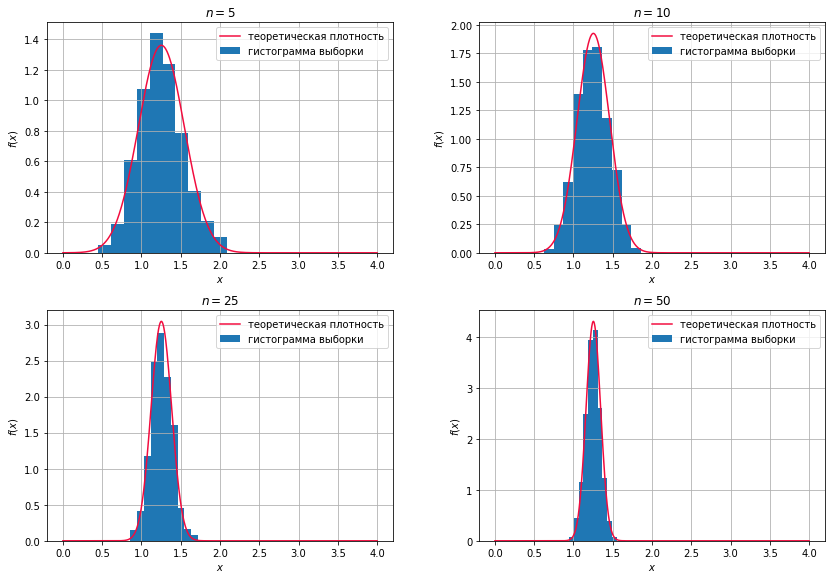

In [55]:
fig = plt.figure()
ax = fig.add_axes([0, 1, 0.8, 0.8])
plt.hist(r5, label = 'гистограмма выборки', density=True)
plt.plot(a, pdf5, color='#F20C3E', label = 'теоретическая плотность')
grid = plt.grid(True) 
plt.xlabel('$ x $')
plt.ylabel('$ f(x) $')
plt.title('$n = 5$')
plt.legend();

ax = fig.add_axes([1, 1, 0.8, 0.8])
plt.hist(r10, label = 'гистограмма выборки', density=True)
plt.plot(a, pdf10, color='#F20C3E', label = 'теоретическая плотность')
grid = plt.grid(True)  
plt.xlabel('$ x $')
plt.ylabel('$ f(x) $')
plt.title('$n = 10$')
plt.legend();

ax = fig.add_axes([0, 0, 0.8, 0.8])
plt.hist(r25, label = 'гистограмма выборки', density=True)
plt.plot(a, pdf25, color='#F20C3E', label = 'теоретическая плотность')
grid = plt.grid(True)  
plt.xlabel('$ x $')
plt.ylabel('$ f(x) $')
plt.title('$n = 25$')
plt.legend();

ax = fig.add_axes([1, 0, 0.8, 0.8])
plt.hist(r50, label = 'гистограмма выборки', density=True)
plt.plot(a, pdf50, color='#F20C3E', label = 'теоретическая плотность')
grid = plt.grid(True)  
plt.xlabel('$ x $')
plt.ylabel('$ f(x) $')
plt.title('$n = 50$')
plt.legend();

### Выводы:

###### как и предпологалось в центральной предельной теореме, при увеличении размера выборки прослеживается явное приближение исследуемого распределения (Рэлея) к нормальному распределению. чтд :)